# Neural Network from Scratch

Neural Networks is an essential component of Deep learning and in this notebook, we're trying to build one starting from zero.

## Basics

The main core of a neural network are the neurons composing them. A neuron is a piece of the brain that serves as an processing unit for information. In other words, it takes an input, process it, and produces an output, **much like a function does**.

More precisely it takes a numerical input, and produces a numerical output.

In [2]:
def a_processor(x):
    return x * 7 + 6

print("Input:", 5, "/ Output:", a_processor(5))

Input: 5 / Output: 41


### Linear inputs

The main aspect of the neuron is processing an input in a linear way. We enter a number $x$ and the output is a linear computation under the form $ax + b$. 

Now let's suppose, as a way to generalize the function, that each entry comes with its own multiplicator instead of 7 and 6, like so:

In [3]:
def artif_neuron(x,a,b):
    return x * a + b

print("Input:", 5, "/ Output:", artif_neuron(5,6,9), "\n")
print("Input:", 5, "/ Output:", artif_neuron(5,7,2), "\n")
print("Input:", 5, "/ Output:", artif_neuron(5,0.56,-0.14), "\n")

Input: 5 / Output: 39 

Input: 5 / Output: 37 

Input: 5 / Output: 2.66 



The same input now gives different results. What's interesting to do is using this function to calculate concrete values, like converting the temperature under different units. In example, converting Fahrenheit to Kelvin degrees.

The formula goes like this :

$$
T(K) = T(°F) \times \frac{5}{9} + 459.67 \times \frac{5}{9}
$$

According to our linear formula, it means $a =\frac{5}{9}$ and $b = 459.67 \times \frac{5}{9}$. Passing in a value in Fahrenheit will give the result in Kelvin degrees.

However, neurons work assuming you don't know the accurate parameters in advance, like in many real world problems. In order to predict the parameters, it must **learn from its errors**. You'll see what I mean by that shortly.

For now let's assume $a=0.25$ and $b=100$. These values have been decided arbitrarily.

In [4]:
a = 0.25
b = 100

real_a = 5/9
real_b = 459.67 * 5/9

#Print the real formula
print("T(K) = T(°F) * ", round(real_a,2), "+", round(real_b,2))

print("Input:", 85)
print("Actual output:", artif_neuron(85,a,b))
print("Expected output:",artif_neuron(85,real_a,real_b))
print("Difference",abs(artif_neuron(85,a,b)-artif_neuron(85,real_a,real_b)))

T(K) = T(°F) *  0.56 + 255.37
Input: 85
Actual output: 121.25
Expected output: 302.59444444444443
Difference 181.34444444444443


As you can see, the absolute difference between the actual and expected output, also called **error** is way too important for the result to be accurate. As such, we need to come up with a way to refine our estimations to diminish this value.

In [5]:
a=0.4
b=230

print("Input:", 85)
print("Actual output:", artif_neuron(85,a,b))
print("Expected output:",artif_neuron(85,real_a,real_b))
print("Difference",abs(artif_neuron(85,a,b)-artif_neuron(85,real_a,real_b)))

Input: 85
Actual output: 264.0
Expected output: 302.59444444444443
Difference 38.594444444444434


The difference is immediately much better. As you can expect, the closer you are to the result, the smaller the error will be. In an ANN there's actually a way to connect $a$, $b$, and this absolute error called $\epsilon$. This relation in question helps **correcting** these parameters to get closer to the expected value.

As a sidenote, we can compute several outputs from several inputs using the same $(a,b)$ combination. Each of these points form a line. $a$ is thus called **the slope** of that line and $b$ is called **the intercept**.

In [6]:
inputs = [10, 23, 32, 46, 51, 68]
outputs = [artif_neuron(i,a,b) for i in inputs]

print("X=",inputs)
print("Y=",outputs)

X= [10, 23, 32, 46, 51, 68]
Y= [234.0, 239.2, 242.8, 248.4, 250.4, 257.2]


### Tuning the parameters

The famous relation between the error and the parameters consist in trying to bring each parameter a little bit closer to the expectation. Suppose we're defining arbitrarily $a$ and $b$. We have to find a way for the algorithm to guess values that are close to the truth.

1. Initiate $a$ and $b$.
2. Run a loop in which we compute a value in Kelvin degrees and compute the error. We're updating $a$ and $b$ and compute a new output and a new value error. If the error is below a defined threshold, the result is then considered as accurate.
3. Output the new $a$ and $b$, the associated error and the number of iterations.

The operation in which we're trying to find the most suitable parameter is called **error minimization**. In this piece of code I'd actually advise people to play with the increase/decrease steps and the threshold to see your results.

In [7]:
#Actual Kelvin value
def fahrenheit_2_kelvin(T):
    return 5/9 * T + 459.67 * 5/9

def minimize_error(x,a,b):
    counter = 0 #Sets the counter for number of iterations
    threshold = 10 #Sets an arbitrary threshold to stop the loop
    error = threshold + 1 #Set error on some arbitrary value
    
    #Being the loop and stop when error is udner threshold
    while abs(error) > threshold:
        #If the esimated temperature is lower, rise the parameters
        #with some arbitrary step, decrease them otherwise
        if fahrenheit_2_kelvin(x) > artif_neuron(x,a,b):
            a += 0.025
            b += 10
        else:
            a -= 0.025
            b -= 10
        y_expected = fahrenheit_2_kelvin(x)
        y_actual = artif_neuron(x,a,b)
        error = abs(y_expected-y_actual)
        counter += 1
        #Set this as precaution in case the algorithm diverges
        if counter > 10000:
            print("Error: diverging...")
            break
    return a, b, error, counter

a = 0.25
b = 100

new_a, new_b, e, n_iterations = minimize_error(85,a,b)
print("Slope:", new_a)
print("Intercept:", new_b)
print("Error:", e)
print("Number of iterations:", n_iterations)

Slope: 0.6250000000000003
Intercept: 250
Error: 0.5305555555555657
Number of iterations: 15


As you can see, the algorithm is sensitive to input values. If you set up an $a$ and $b$ too far from the truth, you're going to take longer to reach the desired output. You may change the variables to increase or decrease $a$ and $b$, but if you set them up too high you might never converge. And if you set them too low you might exceed the number of iterations. Watch out for your threshold also. The lower the threshold is, the more accurate your result might be.

### Building a linear classifier

Almost every problem in Deep Learning is a classification problem. A classificaiton problem consists in telling the model how to distinguish from different classes given a dataset. This is where the lines obtained with the neuron come in.

A perfect illustration is the plot below, where we're distinguishing two types of iris -Setosa and Virginica- from their petal size. The goal of the neuron is to find a way to tell them apart.

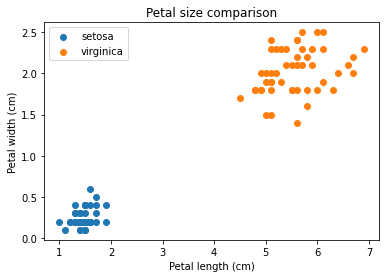

In [8]:
%matplotlib inline
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

data = load_iris()
iris = pd.DataFrame(data=data.data, columns=data.feature_names)
iris['target'] = data.target
iris['target'] = iris.target.apply(lambda x: data.target_names[x])

setosa_set = iris.loc[(iris.target.str.contains('setosa')),['petal length (cm)','petal width (cm)']]
virginica_set = iris.loc[(iris.target.str.contains('virginica')),['petal length (cm)','petal width (cm)']]

plt.scatter(setosa_set['petal length (cm)'], setosa_set['petal width (cm)'], label='setosa')
plt.scatter(virginica_set['petal length (cm)'],virginica_set['petal width (cm)'], label='virginica')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Petal size comparison')
plt.legend()

The setosa species has shorter and smaller petals than then virginica one, up to the point we could divide this plot in half to tell them apart. The line obtained is called a **classifier**.

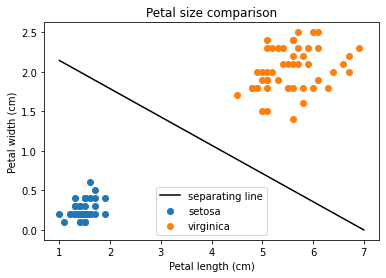

In [9]:
x = range(1,8)
y = [artif_neuron(i,-2.5/7,2.5) for i in x]

plt.scatter(setosa_set['petal length (cm)'], setosa_set['petal width (cm)'], label='setosa')
plt.scatter(virginica_set['petal length (cm)'],virginica_set['petal width (cm)'], label='virginica')
plt.plot(x,y,color='black',label='separating line')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Petal size comparison')
plt.legend()

In order to train a classifier, it follows the same rules than a dot, except with a line. This time the neurons receives multiple inputs with the same coefficients.

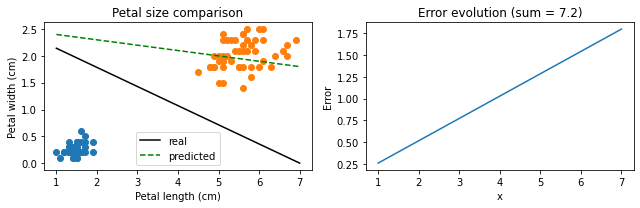

In [31]:
real_a = -2.5/7
real_b = 2.5

a = -0.1
b = 2.5

x = range(1,8)
y_true = [artif_neuron(i,real_a,real_b) for i in x]
y_pred = [artif_neuron(i,a,b) for i in x]
e = [abs(v1-v2) for v1, v2 in zip(y_true, y_pred)]

plt.figure(figsize=(9, 3))

plt.subplot(121)
plt.tight_layout()
plt.scatter(setosa_set['petal length (cm)'], setosa_set['petal width (cm)'])
plt.scatter(virginica_set['petal length (cm)'],virginica_set['petal width (cm)'])
plt.plot(x,y_true,color='black',label='real')
plt.plot(x,y_pred, 'g--', label='predicted')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Petal size comparison')
plt.legend()

plt.subplot(122)
plt.plot(x,e)
plt.xlabel('x')
plt.ylabel('Error')
plt.title(f'Error evolution (sum = {sum(e)})')


plt.tight_layout()

As you can observe, the estimation leaves a significant margin of error in comparison to the real separation line. The more it follows a particular slope value, the further it strays back from the original separation line. We can apply a short difference on that slope to bring it back closer to the real value.

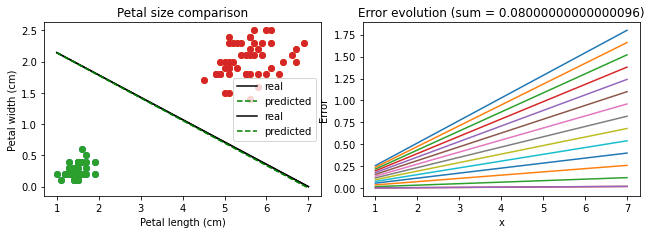

In [52]:
%matplotlib inline
plt.rcParams["animation.html"] = "jshtml"
import matplotlib.animation as animation

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 3))
fig.tight_layout()

# Modify this value and sees how it works
da = -0.02

real_a = -2.5/7
real_b = 2.5

a = -0.1
b = 2.5

def set_plot(x,y_true,y_pred,e):
    ax1.scatter(setosa_set['petal length (cm)'], setosa_set['petal width (cm)'])
    ax1.scatter(virginica_set['petal length (cm)'],virginica_set['petal width (cm)'])
    ax1.plot(x,y_true,color='black',label='real')
    l1, = ax1.plot(x,y_pred, 'g--', label='predicted')
    ax1.set_xlabel('Petal length (cm)')
    ax1.set_ylabel('Petal width (cm)')
    ax1.set_title('Petal size comparison')
    ax1.legend()
    
    l2, = ax2.plot(x,e)
    ax2.set_xlabel('x')
    ax2.set_ylabel('Error')
    ax2.set_title(f'Error evolution (sum = {sum(e)})')
    return (l1, l2)
    

def init():
    x = range(1,8)
    y_true = [artif_neuron(i,real_a,real_b) for i in x]
    y_pred = [artif_neuron(i,a,b) for i in x]
    e = [abs(v1-v2) for v1, v2 in zip(y_true, y_pred)]
    return set_plot(x,y_true,y_pred,e)
    

def animate(i):
    global a
    x = range(1,8)
    a += da
    y_pred = [artif_neuron(i,a,b) for i in x]
    e = [abs(v1-v2) for v1, v2 in zip(y_true, y_pred)]
    
    ax1.cla()
    return set_plot(x,y_true,y_pred,e)
    

ani = animation.FuncAnimation(fig, animate, frames=13, init_func=init)
ani

As you may have expected, by affecting the coefficient with a small value, we managed to adjust the curve till we got what we desired. From the results you can actually see that the closer the line gets to the result, the flatter the error curve gets and the smaller the absolute error is. This point illustrates the core of the learning mechanism of a neuron. The parameter `da` is called **the learning rate**. It describes how fast the neuron is learning. 

Now there's one last step before finalizing the classifier and it's associating a point to one of the two classes. Fortunately, with that simple line, we can determine whether a point belongs in one of the two classes:

* If it's under the line, it's a setosa
* if it's over the line, it's a virginica

In other words, the neuron would take an input and return a boolean, in the case of a binary classification. Suppose we're associating numbers to both classes. Setosa would take **0** and virginica **1** :

It's a virginica


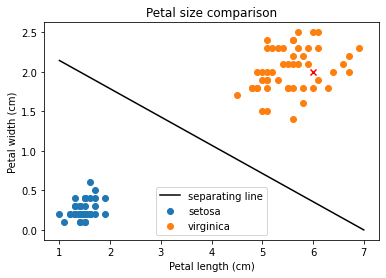

In [54]:
x = range(1,8)
y = [artif_neuron(i,-2.5/7,2.5) for i in x]

#Define a new point
new_point = (6,2)

y_pred = artif_neuron(new_point[0],-2.5/7,2.5)

if y_pred > new_point[1]:
    print("It's a setosa")
else:
    print("It's a virginica")
    
plt.scatter(setosa_set['petal length (cm)'], setosa_set['petal width (cm)'], label='setosa')
plt.scatter(virginica_set['petal length (cm)'],virginica_set['petal width (cm)'], label='virginica')
plt.plot(x,y,color='black',label='separating line')
plt.scatter(new_point[0], new_point[1], color='red', marker='x')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Petal size comparison')
plt.legend()

This ability to transform the result in a boolean is the mechanism of what's called an **activation function**. An activation function is a way to turn a linear problem (the line we defined) into a non-linear problem (transformation into booleans).

### Towards a more complex case

However, data is hardly linear and well-compartimented like the example above. Besides, it hardly ever relies on two variables. A dataset can be composed of several variables influencing the outcome and representing this data in a multidimensional space is very difficult. Thus the necessity to find a way to generalize the problem.

No handles with labels found to put in legend.


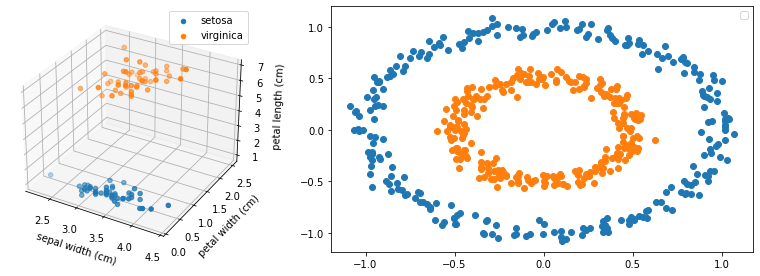

In [69]:
from sklearn.datasets import make_circles

X_circles, y_circles = make_circles(n_samples=500, factor=.5, noise=.05)

fig = plt.figure(figsize=(12, 4))
ax_3d = fig.add_subplot(121, projection='3d')
ax = fig.add_subplot(122)
fig.tight_layout()

#Adding sepal width to the dataset
setosa_set['sepal width (cm)'] = iris.loc[iris.target.str.contains('setosa'),'sepal width (cm)']
virginica_set['sepal width (cm)'] = iris.loc[iris.target.str.contains('virginica'),'sepal width (cm)']

ax_3d.scatter(setosa_set['sepal width (cm)'], setosa_set['petal width (cm)'], setosa_set['petal length (cm)'], label='setosa')
ax_3d.scatter(virginica_set['sepal width (cm)'], virginica_set['petal width (cm)'], virginica_set['petal length (cm)'], label='virginica')
ax_3d.set_xlabel('sepal width (cm)')
ax_3d.set_ylabel('petal width (cm)')
ax_3d.set_zlabel('petal length (cm)')
ax_3d.legend()

ax.scatter(X_circles[y_circles==0][:,0], X_circles[y_circles==0][:,1])
ax.scatter(X_circles[y_circles==1][:,0], X_circles[y_circles==1][:,1])
ax.legend()

While separating the now generated 3D plot is obvious, a line won't be enough to separate those two circles. We have to find an alternative way. But for now, let's focus on that 3D plot and let's see how we can insert another input in our neuron.

Since this other input depends of another coefficient, or **weight**, we're going to add another one, this time considering one point as an input.

In [71]:
a = [2, 3]
x = [1, 2]
b = 5

def artif_neuron(x,a,b):
    return sum([xn * an for xn,an in zip(x,a)]) + b

print("y=",artif_neuron(x,a,b))

y= 13


So what's happening there? We modified our function to consider a list of weights and inputs, including a bias term `b`, returning an output that is the total sum of these variables. The main issue is how exactly can we fire up this output from an activation function, considering the result comes from two inputs? How can we predict the class of iris, using the petal and sepal width combined?

This is where we're introducing Boolean operators. If we assume there's two classes and we're getting two variables $x$ and $y$, then we can make up where the data point belongs in the classifier.

* The operator **AND** indicates the intersection
* The operator **OR** indicates the union
* The operator **XOR** indicates the exclusive union where both values have to be different

Simply put, if we pick the class we want to evaluate as true (1) and the other class as false (0), then our board should look like this :


| x | y | x AND y | x OR y | x XOR y |
|---|---|---------|--------|---------|
| 1 | 1 | 1       | 1      | 0       |
| 1 | 0 | 0       | 1      | 1       |
| 0 | 1 | 0       | 1      | 1       |
| 0 | 0 | 0       | 0      | 0       |

The metrics of an activation function follow this pattern. For example, if a variable defines a point as a virginica and the other as a setosa, according to the *OR* boolean, it would classify as a virginica.

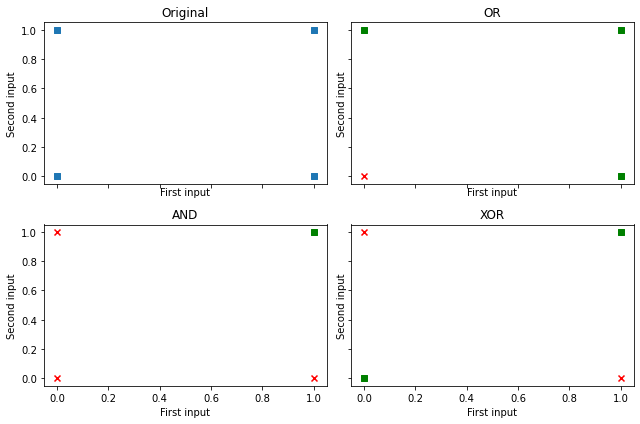

In [102]:
x = [1, 1, 0, 0]
y = [1, 0, 1, 0]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(9, 6),sharex=True,sharey=True)


ax[0,0].scatter(x,y, marker="s")
ax[0,0].set_title("Original")
ax[0,0].set_xlabel("First input")
ax[0,0].set_ylabel("Second input")

ax[1,0].scatter(x[0], y[0], color='g', marker='s')
ax[1,0].scatter(x[1:], y[1:] ,color='r', marker='x')
ax[1,0].set_title("AND")
ax[1,0].set_xlabel("First input")
ax[1,0].set_ylabel("Second input")

ax[0,1].scatter(x[:3], y[:3], color='g', marker='s')
ax[0,1].scatter(x[-1], y[-1], color='r', marker='x')
ax[0,1].set_title("OR")
ax[0,1].set_xlabel("First input")
ax[0,1].set_ylabel("Second input")

ax[1,1].scatter([x[0],x[-1]], [y[0],y[-1]],color='g', marker='s')
ax[1,1].scatter(x[1:3],y[1:3], color='r', marker='x')
ax[1,1].set_title("XOR")
ax[1,1].set_xlabel("First input")
ax[1,1].set_ylabel("Second input")

fig.tight_layout()

As you can see from this graph, the class 0 is marked with red ticks while the class 1 is marked with green squares. For AND and OR, the choice seems obvious: a linear classifier is enough. For XOR however, using a simple line isolates one of the points from its class. So the most logical solution is to call for another classifier, isolating two of the points in a corridor. Using this technique we can even encaspulate more complex patterns.

## Building a neural network

### Building a perceptron

Let's recap what we've seen so far:

* An artifical neuron relies on a linear function
* It converts the output from that linear function into a boolean signal
* It uses a learning rate to reequilibrate its weights
* It's mostly used for classification

The neuron is one of the many elements composing our brain. It allows our species to distinguish between several elements like the mous of your computer, the screen, the desk, and tell in which language you type. However, what seems natural for us isn't for a computer. It needs to reproduce a mechanism similar to ours. 

The **perceptron** is essentially one single neuron operating on everything we've seen so far:

1. It accepts a series of inputs $X$ per feature, each feature governed by a series of **weights** $w$
2. It calculates the total weighted sum of $X$ and adds a **bias** term, $b$
3. It takes the total output and process it through an **activation function**, converting the result in a signal

Let's explain the construction step by step. It takes back the code we have written, this time for a series of 4, on 3 features. Naturally we have to find a way to transform these double arrays in a single scalar.

In [145]:
w = [2, 3, -2.5]
x = [[2.1, 3.5, 6, 4.2], #Feature 1
     [5.6, 1.3, 4.8, 9.6], #Feature 2
     [4.5, 7.8, 6.3, 2.9]] #Feature 3
b = 5

def simple_perceptron(x,w,b):
    output = [[w[i] * entry +b for entry in x[i]]  for i in range(len(w))]
    return [sum([output[j][i] for j in range(len(output))]) for i in range(len(output[0]))]

print(simple_perceptron(x,w,b))

[24.749999999999996, 6.399999999999999, 25.65, 44.949999999999996]


Next, we want to convert that result into a signal. We can count on activation functions for that.

Activation functions can be different according to the shape, and efficiency. Here's a couple of examples :

* The **step function** takes the output and returns 0 if it's negative or 1 if it's positive
* The **sigmoid function** is similar to the step function with a smoother boundary between 0 and 1
* The rectified linear unit function, also called **ReLU**, takes the maximum between 0 and the result

There's a couple of other activation functions as shown under that [StackExchange ask](https://stats.stackexchange.com/questions/115258/comprehensive-list-of-activation-functions-in-neural-networks-with-pros-cons) that you can study. Eventually you have to decide what's best for your problem.

In [123]:
# You can add as many activation functions as you'd like to in this cell
def step_function(x):
    return 1 if x>=0 else 0

def sigmoid_function(x):
    return 1 / (1+ exp(x))

def relu(x):
    return max(0, x)

In [148]:
def simple_perceptron(x,w,b,act_func):
    output = [[w[i] * entry +b for entry in x[i]]  for i in range(len(w))]
    return [act_func(sum([output[j][i] for j in range(len(output))])) for i in range(len(output[0]))]

print(simple_perceptron(x,w,b,step_function))

[1, 1, 1, 1]


### Building a layer

So far we've seen how a single neuron -the perceptron- works. Now let's assume we're adding another perceptron alongside the one we created. This one will take the same inputs than the previous one, but both the weights and biases will be different. 

In our case we'll repeat our previous code by changing the weights and bias.

In [149]:
def simple_perceptron(x,w,b,act_func):
    output = [[w[i] * entry +b for entry in x[i]]  for i in range(len(w))]
    return [act_func(sum([output[j][i] for j in range(len(output))])) for i in range(len(output[0]))]

neuron_1= simple_perceptron(x,w,b,step_function)

w = [-1.2, 0.25, 0.75]
b = -1

neuron_2= simple_perceptron(x,w,b,step_function)

print(neuron_1, neuron_2)

[1, 1, 1, 1] [0, 0, 0, 0]


It seems to be fine so far, but let's assume we want to add another neuron, and another one after that... probably even 5, 20 or 100. Our code seems to be pretty impractical for that. We would either overwrite `w` and `b` or stock them in longer lists, which can be really redundant.

Fortunately we can deal with it using linear algebra. Indeed, stocking all the weights per perceptron is the same as creating a 2D matrix where one dimension would contain the **number of features** and the other one would contain the **number of neurons**. The same way, the bias can become a vector, each feature being a neuron's bias.

It just so happen that the **NumPy** module is suited for matrix operations. Let's now assume we have 5 perceptrons.

In [164]:
import numpy as np

X = np.array([[2.1, 3.5, 6, 4.2], [5.6, 1.3, 4.8, 9.6], [4.5, 7.8, 6.3, 2.9]])
W= np.array([[2, 3, -2.5], [-1.2, 0.25, 0.75], [-0.3, 3.56, 4], [0.98, -0.4, -6], [-7, 8, 0.5]])
b = np.array([5, -1, -3, 0.8, 0.2])

print("Input dims: ", X.shape)
print("Weight dims: ", W.shape)
print("Bias dims: ", b.shape)

Input dims:  (3, 4)
Weight dims:  (5, 3)
Bias dims:  (5,)


The main advantage of this structure is the matrix multiplication or **dot product**. The dot product takes two matrix, the first one having **the same number of columns** than the second one having **the same number of lines**. What it does essentially, it takes one line of the first matrix, one column of the second matrix, multiply each element and sums them up in a new component. 

Basically, if you have matrix $A$ of dimension $n \times p$ and matrix $B$ of dimension $p \times q$, then the product of $A \times B$ will result in a matrix $C$ of dimension $n \times q$.

You can check [this video from 3Blue1Brown](https://www.youtube.com/watch?v=XkY2DOUCWMU) to see how matrix multiplication works. It's fairly used for linear space changesin maths and physics.

For our example we now have 3 elements :
* An input matrix of 3 features and 4 elements in total
* A weight matrix of 5 neurons and 3 features
* A bias vector of 5 neurons

The goal is to result in an output matching the number of layers. In other words, obtaining a matrix of 5 neurons and 4 inputs.

In [165]:
X = X.T #We're flipping the matrix since the features must be organized in columns

print(X@W.T+b)

[[ 14.75    1.255  34.306 -26.382  32.55 ]
 [ -3.6     0.975  31.778 -43.09  -10.   ]
 [ 15.65   -2.275  37.488 -33.04   -0.25 ]
 [ 34.95   -1.465  41.516 -16.324  49.05 ]]


We can now pass in an activation function.

In [170]:
def step_function(x):
    if type(x) is np.ndarray:
        res = x.copy() #Creates a copy to avoid overwriting input
        res[x<0] = 0
        res[x>=0] = 1
        return res
    else:
        return 1 if x>=0 else 0
        
print(step_function(X@W.T+b))

[[1. 1. 1. 0. 1.]
 [0. 1. 1. 0. 0.]
 [1. 0. 1. 0. 0.]
 [1. 0. 1. 0. 1.]]


We can now write a general method about it. 

In [171]:
def create_layer(x,w,b,act_func):
    return act_function(X@W.T+b)

When we gather several neurons to accept the same entires, the result is called a layer. In fact, a neural network is composed of three types of layers :

* The input layer: the layer taking all the entries
* The output layer: the layer exposing an output, usually a layer as many neurons as available classes
* The hidden layers : everything in-between.

The hidden layers in particular -also called dense layers- are the intermediate process taking an entry from the previous layer, and communicating the output to the next layer. This processus is called **fastforwarding**.

It's possible to represent a layer as an object. That layer would contain a number of neurons and accept a number of inputs, then fastforward the input according to an activation function.

In [174]:
class LayerDense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
    def activation_function(self, func):
        return func(self.output)

In [177]:
layer = LayerDense(X.shape[1],5)
layer.forward(X)
print(layer.output)

def relu(X):
    return np.maximum(0,X)

print(layer.activation_function(relu))

[[ 0.32035139 -0.37640666  1.81985364 -0.35131795  0.88178194]
 [ 0.93686486  0.64832439  1.91399991 -0.23475317  1.30647625]
 [ 0.59759128  0.22480927  2.01964988 -0.41142318  1.29406065]
 [-0.05568452 -0.9210821   1.98650652 -0.54155723  0.84990713]]
[[0.32035139 0.         1.81985364 0.         0.88178194]
 [0.93686486 0.64832439 1.91399991 0.         1.30647625]
 [0.59759128 0.22480927 2.01964988 0.         1.29406065]
 [0.         0.         1.98650652 0.         0.84990713]]
